In [15]:
# setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from PIL import Image
import os

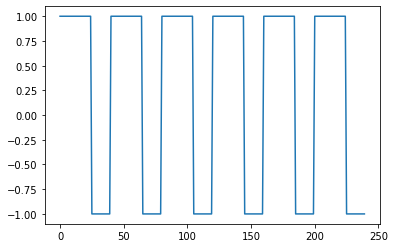

In [16]:
# Question 1.1 

AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
ONES_DURATION = [15, 20, 25, 15, 20, 25]
N = 240
NUM_T_SOURCES = 6
tc = []
t_vector_names = ['TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6']

for vector_num in range(NUM_T_SOURCES):
    vector = []
    index = 0
    # adding in 0s while incrementing to arrival 
    while index < AV[vector_num]:
        vector.append(0)
        index += 1
    one_count = 0
    inc_count = 0
    while index < N:
        # resetting counts if an increment has been completed
        if inc_count >= IV[vector_num]:
            inc_count = 0
            one_count = 0
        if one_count < ONES_DURATION[vector_num]:
            vector.append(1)
            one_count += 1
        else:
            vector.append(-1)
        # incrementing counters 
        inc_count += 1
        index += 1   
    # plotting time course
    plt.clf()
    plt.plot(range(len(vector)), vector)
    plt.savefig('../plots/1.1_time_courses/tc_' + str(vector_num + 1) + '.jpeg')
    # mean subtraction followed by division by std dev
    vector = [x - np.mean(vector) for x in vector]
    vector = [x / np.std(vector) for x in vector]

    tc.append(vector)

# check matrix 
def check_vector(vector):
    prev_value = vector[0]
    count = 0
    print_list = []
    for val in vector:
        if val == prev_value:
            count += 1
        else:
            print_list.append([count, prev_value])
            count = 1
            prev_value = val
    print(print_list)

# rotating matrix so that a df can be made with dimensions 240 x 6 
tc  = zip(*reversed(tc))
tc_df = pd.DataFrame(tc, columns = t_vector_names)
tc = tc_df.to_numpy()

<Figure size 432x288 with 0 Axes>

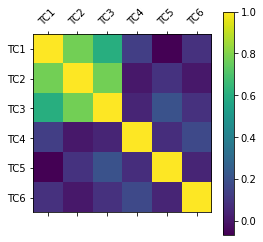

In [17]:
#Question 1.2
def get_cm(df, num_vectors, tick_labels, save_path):
    plt.clf()
    if len(df.iloc[0]) == num_vectors:
        plt.matshow(df.corr())
    else:
        plt.matshow(df.T.corr())
    plt.colorbar()
    ticks = [i for i in range(num_vectors)]
    plt.xticks(ticks, tick_labels, rotation=45)
    plt.yticks(ticks, tick_labels)
    plt.savefig(save_path)

get_cm(tc_df, NUM_T_SOURCES, t_vector_names, '../plots/1.2_correlation_matrix/CM.jpeg')    

<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

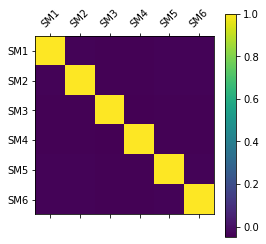

In [18]:
# Question 1.3
tmpSM = []
NUM_MAPS = 6 
MAP_WIDTH = 21
MAP_LENGTH = 21
V = 441
V_SLICE = [[2,6], [2,6], [8,13], [8,13], [15, 19], [15, 19]]
H_SLICE = [[2,6], [15,19], [2,6], [15,19], [2, 6], [15, 19]]
s_vector_names = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']

def plot_map(matrix, axis):
    axis.matshow(matrix)
    #axis.colorbar()
    axis.xticks(np.arange(0, MAP_WIDTH+1, 2.0))
    axis.yticks(np.arange(0, MAP_LENGTH+1, 2.0))

for matrix_num in range(NUM_MAPS):
    # creating blank matrix of 0s 
    matrix = []
    for i in range(MAP_LENGTH):
        row = []
        for j in range(MAP_WIDTH):
            row.append(0)
        matrix.append(row)
    # adding ones 
    for i in range(V_SLICE[matrix_num][0], V_SLICE[matrix_num][1]):
        for j in range(H_SLICE[matrix_num][0], H_SLICE[matrix_num][1]):
            matrix[i][j] = 1
    # plotting map
    plt.clf()
    plot_map(matrix, plt)
    plt.savefig('../plots/1.3_spacial_maps/sm_' + str(matrix_num + 1) + '.jpeg')

    tmpSM.append(matrix)

# reshaping array
sm = []
for matrix_num in range(NUM_MAPS):
    vector = []
    for row in tmpSM[matrix_num]:
        for val in row:
            vector.append(val)
    sm.append(vector)

sm_df = pd.DataFrame(sm, columns = range(1, V+1))
get_cm(sm_df, NUM_MAPS, s_vector_names, '../plots/1.3_spacial_maps/CM.jpeg')

/home/hjthorpe/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hjthorpe/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

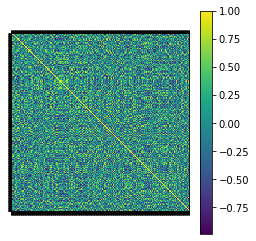

In [19]:
# Question 1.4
T_NOISE_VAR = 0.25
S_NOISE_VAR = 0.015
MEAN = 0

def get_noise(width, length, mean, var):
    gamma = []
    noise = list(np.random.normal(mean, np.sqrt(var), size=length*width))
    index = 0 
    for i in range(length):
        vector = []
        for j in range(width):
            vector.append(noise[index])
            index += 1
        gamma.append(vector)
    return gamma, noise

# generating temporal noise, correlation matrix and histogram
gamma_t, t_noise = get_noise(NUM_T_SOURCES, N, MEAN, T_NOISE_VAR)
gamma_t_df = pd.DataFrame(gamma_t,  columns = t_vector_names)
get_cm(gamma_t_df, NUM_T_SOURCES, ['N_TC1', 'N_TC2', 'N_TC3', 'N_TC4', 'N_TC5', 'N_TC6'], '../plots/1.4_noise/time_noise_cm.jpeg')
plt.clf()
sns.distplot(t_noise)
plt.savefig('../plots/1.4_noise/time_noise_hist.jpeg')

# generating spacial noise, correlation matrix and histogram
gamma_s, s_noise = get_noise(V, NUM_MAPS, MEAN, S_NOISE_VAR)
gamma_s_df = pd.DataFrame(gamma_s,  columns = range(1, V+1))
get_cm(gamma_t_df, NUM_MAPS, ['N_SM1', 'N_SM2', 'N_SM3', 'N_SM4', 'N_SM5', 'N_SM6'], '../plots/1.4_noise/space_noise_cm.jpeg')
plt.clf()
sns.distplot(t_noise)
plt.savefig('../plots/1.4_noise/space_noise_hist.jpeg')

# product of Gamma t and Gamma s
noise_product_df = pd.DataFrame(np.dot(gamma_t_df, gamma_s_df), columns=range(1, V+1))
get_cm(noise_product_df, V, [], '../plots/1.4_noise/noise_product_cm.jpeg')


240


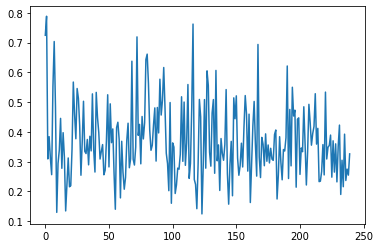

In [20]:
# Question 1.5 
left = (tc_df.add(gamma_t_df))
right = (sm_df.add(gamma_s_df))
X = np.dot(left, right)
print(len(X))

# checking if TC x Gamma_s and Gamma_t x SM exists
tc_space_noise_product = np.dot(tc_df, gamma_s_df)
sm_time_noise_product = np.dot(gamma_t_df, sm_df)

# plotting 100 random series 
time_series_for_plot = random.sample(range(len(X[0])), 100)
plt.clf()
for time_series_num in time_series_for_plot:
    time_series = []
    for row in X:
        time_series.append(row[time_series_num])
    plt.plot(range(len(time_series)), time_series)
plt.savefig('../plots/1.5_X/random_time_series.jpeg')

# plotting variances of variables
vars = []
for variable in X:
    var = np.var(variable)
    vars.append(var)
plt.clf()
plt.plot(range(len(vars)), vars)
plt.savefig('../plots/1.5_X/variances.jpeg')

# standardizing X
X_standardized = []
for variable in range(len(X)):
    vector = X[variable]
    vector = [x - np.mean(vector) for x in vector]
    vector = [x / np.std(vector) for x in vector]
    X_standardized.append(vector)
X = X_standardized

(6, 441)
6
(240, 6)
240


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

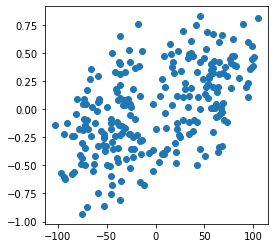

In [21]:
# Question 2.1 
D = tc_df
A = sm_df
A_LSR = np.dot(np.dot((np.linalg.inv(np.dot(D.transpose(), D))), D.transpose()), X)
D_LSR = np.dot(X, A_LSR.transpose())

# plotting retrieved sources
print(A_LSR.shape)
print(len(A_LSR))
print(D_LSR.shape)
print(len(D_LSR))

for retrieved in range(NUM_MAPS):
    # getting plot of map 
    sm = A_LSR[retrieved]
    # rearranging map into matrix
    map_matrix = []
    for i in range(MAP_LENGTH):
        row = []
        for j in range(MAP_WIDTH):
            row.append(sm[(i * MAP_WIDTH) + j])
        map_matrix.append(row)
    # plotting map
    plt.clf()
    plot_map(map_matrix, plt)
    plt.title('Retrieved Spatial Map ' + str(retrieved + 1))
    map_path = '../plots/2.1/map' + str(retrieved + 1) + '.jpeg'
    plt.savefig(map_path)

    # geting time course 
    time_series = []
    for row in X:
        time_series.append(row[retrieved])
    # plotting time course   
    plt.clf()
    plt.plot(range(len(time_series)), time_series)
    plt.title('Retrieved Time Course ' + str(retrieved + 1))
    time_path = '../plots/2.1/time' + str(retrieved + 1) + '.jpeg'
    plt.savefig(time_path)

    # combining subplots
    images = [Image.open(x) for x in [map_path, time_path]]
    widths, heights = zip(*(i.size for i in images))
    new_img = Image.new('RGB', (sum(widths), max(heights)))
    x_offset = 0
    for img in images:
        new_img.paste(img, (x_offset,0))
        x_offset += img.size[0]
    new_img.save('../plots/2.1/retrieved_' + str(retrieved + 1) + '.jpg')
    
    #removing temporary subplots
    os.remove(map_path)
    os.remove(time_path)

def get_column(matrix, col_num):
    """Retrivies column col_num from matrix"""
    col = []
    for row in matrix:
        col.append(row[col_num])
    return col

# Scatter plot of 3rd column of D_lSR and 30th column of standardized X
plt.clf()
plt.scatter(get_column(D_LSR, 3), get_column(X, 29))
plt.savefig('../plots/2.1/D_LSR_3rdCol_vs_X_30thCol.jpeg')
# Scatter plot of 4th column of D_lSR and 30th column of standardized X
plt.clf()
plt.scatter(get_column(D_LSR, 4), get_column(X, 29))
plt.savefig('../plots/2.1/D_LSR_4thCol_vs_X_30thCol.jpeg')

Chosen value for lambda:  0.38
Sum of c_TRR 0.9925593985702469
Sum of c_TLSR 0.992411131982585


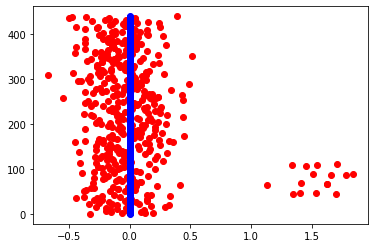

In [80]:
# Question 2.2
def get_corr_vector(TC, D_):
    """returns a vector only retaining maximum absolute correlations between TC and D_"""
    corr_vector = []
    for row_num in range(len(TC)):
        #corr_vector.append(abs(np.corrcoef(get_column(TC, row_num), (get_column(D_, row_num)))[0][1]))
        corr_vector.append(abs(np.corrcoef(TC[row_num], D_[row_num])[0][1]))
    corr_max = np.amax(corr_vector)
    corr_max_vector = []
    for elem in corr_vector:
        if elem == corr_max:
            corr_max_vector.append(elem)
    return corr_max_vector
    #return corr_vector

def get_A_LRR(lambda_val):
    """Returns ridge regression paramater for A based on lambda_val"""
    return np.dot(np.dot((np.linalg.inv(np.dot(D.transpose(), D) + (lambda_val * np.identity(NUM_MAPS)))), D.transpose()), X)

# guess and checking for optimal value of lambda by maximising sum of c_TRR
max_corr_sum = 0
max_lambda = 0
for val in range(1, 101):
    val = val / 100 # to make lambda between 0 and 1 
    lambda_tilde = val * V # gets lambda tilde
    A_LRR = get_A_LRR(lambda_tilde)
    D_LRR = np.dot(X, A_LRR.transpose())

    temp_sum = sum(get_corr_vector(tc, D_LRR))
    if temp_sum > max_corr_sum:
        max_corr_sum = temp_sum
        max_lambda = val

# performing operations with optimal lambda
A_LRR = get_A_LRR(max_lambda)
D_LRR = np.dot(X, A_LRR.transpose())
c_TLSR = get_corr_vector(tc, D_LSR)
c_TRR = get_corr_vector(tc, D_LRR)

print('Chosen value for lambda: ', max_lambda)
print('Sum of c_TRR', sum(c_TRR))
print('Sum of c_TLSR', sum(c_TLSR))

# plotting first vector from A_RR and A_LSR for lambda=1000
lambda_tilde_1000 = 1000 * V
A_LRR_1000 = get_A_LRR(lambda_tilde_1000)
plt.clf()
plt.scatter(A_LSR[0], range(len(A_LSR[0])), c='r')
plt.scatter(A_LRR_1000[0], range(len(A_LRR_1000[0])), c='b')
plt.savefig('../plots/2.2/first_vector.jpeg')

In [23]:
# Question 2.3


In [24]:
# Question 2.4


In [25]:
# Question 2.5 
